In [ ]:
!rm -r /content/FER_Custom_Dataset

rm: cannot remove '/content/FER_Custom_Dataset': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
shutil.copy("/content/drive/MyDrive/AI_Datasets/FER_Custom_Dataset.zip", "/content")

'/content/FER_Custom_Dataset.zip'

In [ ]:
%cd /content/

/content


In [ ]:
import os

In [ ]:
import zipfile
for file in os.listdir():
    if file.endswith(".zip"):
        with zipfile.ZipFile(file, "r") as zip_file:
            zip_file.extractall()
        os.remove(file)

In [ ]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torch.utils.data.sampler import SubsetRandomSampler
import glob
import torch.optim as optim
import cv2
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as td
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import image
from matplotlib import pyplot
import time
import torchvision.datasets as datasets
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [ ]:
PATH = '/content/FER_Custom_Dataset'
IMAGE_DIM=256
BATCH_SIZE = 32
TEST_SPLIT = 0.2
VAL_SPLIT = 0.1
N_CLASSES = 3
NUM_EPOCHS = 50
print(os.listdir(PATH))

['Disappointed', 'interested', 'neutral']


In [ ]:
def load_data(path, test_split, val_split, batch_size):
    
    transform_dict = {
                    'src': transforms.Compose([
                      transforms.Resize(IMAGE_DIM),
                      transforms.CenterCrop(224),
                      transforms.ToTensor(),
                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                            std=[0.229, 0.224, 0.225]),
     ])}

    data = datasets.ImageFolder(root=path, transform=transform_dict['src'])
    dataset_size = len(data)

    train_size = int((1-(test_split+val_split))*dataset_size)+1
    test_size = int(test_split * dataset_size)
    val_size = int(val_split * dataset_size)
  
    train_dataset, test_dataset, val_dataset = td.random_split(data, [train_size, test_size, val_size])
    
    data_loader_train = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=False, num_workers=0)
    data_loader_test  = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True, drop_last=False, num_workers=0)
    data_loader_val  = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True, drop_last=False, num_workers=0)

    return data_loader_train, data_loader_test, data_loader_val

## Sample Image Plotting 

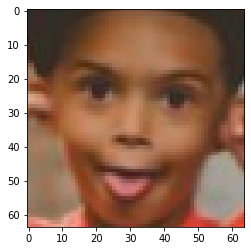

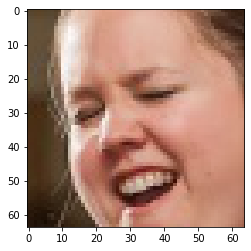

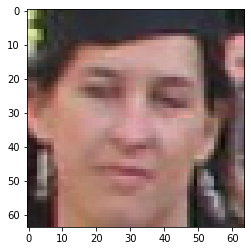

In [ ]:
InterestedImage = matplotlib.image.imread(PATH+"/interested/253.jpg")
plt.figure()
plt.imshow(InterestedImage)
DisaapointedImage =  matplotlib.image.imread(PATH+"/Disappointed/1000.jpg")
plt.figure()
plt.imshow(DisaapointedImage)
NeutralImage =  matplotlib.image.imread(PATH+"/neutral/24634.jpg")
plt.figure()
plt.imshow(NeutralImage)

# Train and Test Loader

In [ ]:
train_loader, test_loader, val_loader = load_data(PATH, TEST_SPLIT, VAL_SPLIT, BATCH_SIZE)
print("Train loader size: ",len(train_loader))
print("Test loader size: ", len(test_loader))
print("Val loader size: ", len(val_loader))

Train loader size:  91
Test loader size:  26
Val loader size:  13


# Random Images From Train Loader

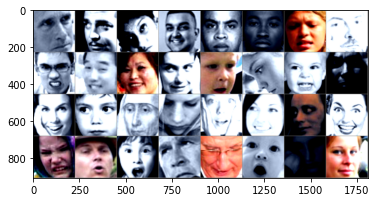

Disappointed interested interested neutral interested interested Disappointed interested Disappointed neutral neutral interested Disappointed Disappointed Disappointed Disappointed neutral interested interested Disappointed neutral neutral Disappointed neutral Disappointed Disappointed neutral Disappointed Disappointed neutral Disappointed interested


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('Disappointed', 'neutral', 'interested')

#Function to show some random images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

#Get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

#Show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(32)))

# AlexNet using Transfer Learning

In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))
model.to(device)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

Device: cuda:0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
 # Updating the second classifier
model.classifier[4] = nn.Linear(4096,1024)

#Updating the third and the last classifier that is the output layer of the network. Make sure to have 3 output nodes if we are going to get 3 class labels through our model.
model.classifier[6] = nn.Linear(1024,3)


# Model Structure

In [ ]:
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

# Criterion and Optimizer Definition

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))
model.to(device);

Device: cuda:0


# Model Training

In [ ]:
def evaluate(model, test_loader):
  model.eval() 
  with torch.no_grad(): 
    correct = 0
    total = 0
    for data in test_loader:
      images, labels = data[0].to(device), data[1].to(device)
      labels=torch.flatten(labels)
      outputs = model(images)
      loss = criterion(outputs, labels)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  accuracy = (correct / total) * 100
  model.train()
  return accuracy, loss.item()

In [ ]:
total_steps = len(train_loader)
t1 = time.time()

training_loss = []
training_accuracy = []
validation_loss = []
validation_accuracy = []

for epoch in range(NUM_EPOCHS):
    for i, data in enumerate(train_loader):
        images, labels = data[0].to(device), data[1].to(device)
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        # Backprop and optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Train accuracy
        total = labels.size(0)
        _,predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        if (i + 1) % 91 == 0:
            val_accu , val_loss = evaluate(model, test_loader)
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%, val_loss: {:.4f}, val_accuracy: {:.2f}%'
            .format(epoch + 1, NUM_EPOCHS, i + 1, total_steps, loss.item(),(correct / total) * 100, val_loss, val_accu))

            training_loss.append(loss.item())
            training_accuracy.append((correct / total) * 100)
            validation_accuracy.append(val_accu)
            validation_loss.append(val_loss)
            
print("######## Training Finished in {} seconds ###########".format(time.time()-t1))

Epoch [1/50], Step [91/91], Loss: 0.9634, Accuracy: 52.17%, val_loss: 0.6273, val_accuracy: 59.83%
Epoch [2/50], Step [91/91], Loss: 1.0746, Accuracy: 39.13%, val_loss: 0.9150, val_accuracy: 68.28%
Epoch [3/50], Step [91/91], Loss: 0.7326, Accuracy: 60.87%, val_loss: 0.7859, val_accuracy: 70.45%
Epoch [4/50], Step [91/91], Loss: 0.5481, Accuracy: 73.91%, val_loss: 0.7272, val_accuracy: 71.53%
Epoch [5/50], Step [91/91], Loss: 0.5310, Accuracy: 78.26%, val_loss: 0.8342, val_accuracy: 70.93%
Epoch [6/50], Step [91/91], Loss: 0.5101, Accuracy: 73.91%, val_loss: 0.5202, val_accuracy: 72.74%
Epoch [7/50], Step [91/91], Loss: 0.5917, Accuracy: 65.22%, val_loss: 0.7661, val_accuracy: 71.41%
Epoch [8/50], Step [91/91], Loss: 0.4493, Accuracy: 73.91%, val_loss: 0.7995, val_accuracy: 71.17%
Epoch [9/50], Step [91/91], Loss: 0.3247, Accuracy: 82.61%, val_loss: 0.7013, val_accuracy: 72.62%
Epoch [10/50], Step [91/91], Loss: 0.4342, Accuracy: 78.26%, val_loss: 0.9636, val_accuracy: 72.14%
Epoch [11

# Save Model

In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/AI_Datasets/AlexNet_Fer_PreTrained.pt")

# Load Model

In [ ]:
model_list=[]
#Alexnet
alexnet_model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet')
 # Updating the second classifier
alexnet_model.classifier[4] = nn.Linear(4096,1024)

#Updating the third and the last classifier that is the output layer of the network. Make sure to have 3 output nodes if we are going to get 3 class labels through our model.
alexnet_model.classifier[6] = nn.Linear(1024,3)
alexnet_model.load_state_dict(torch.load('/content/drive/MyDrive/AI_Datasets/AlexNet_Fer_PreTrained.pt'))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))
alexnet_model.to(device)

model_list.append(alexnet_model)

# #MobileNet
# mobilenet_model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2')
# alexnet_model.load_state_dict(torch.load('/content/drive/MyDrive/AI_Datasets/MobileNet_ferCustom.pt'))

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print("Device: {}".format(device))
# mobilenet_model.to(device)

# model_list.append(mobilenet_model)

#vgg19

vgg19_model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg19')
vgg19_model.load_state_dict(torch.load('/content/drive/MyDrive/AI_Datasets/vgg19_affectnethq.pt'))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))
vgg19_model.to(device)

model_list.append(vgg19_model)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Device: cuda:0


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Device: cuda:0


In [ ]:
from ptflops import get_model_complexity_info
def get_FLOPs(model_name, model=None):
    print(model_name)
   
    if model==None:
        model = torch.hub.load('pytorch/vision:v0.10.0', model_name, verbose=False)
   
    # MAC = Multiply–accumulate operation
    # MACs = 2 * FLOPs
for model in model_list:
    macs, params = get_model_complexity_info(model, (3, 224, 224), as_strings=False,
                                            print_per_layer_stat=False, verbose=True) 
    print('Computational complexity in GFLOPs: ', macs*2/10**9)

Computational complexity in GFLOPs:  1.39775783
Computational complexity in GFLOPs:  39.3358612


# Model Testing

In [ ]:
model.eval() 
with torch.no_grad(): 
  correct = 0
  total = 0
  for data in test_loader:
    images, labels = data[0].to(device), data[1].to(device)
    labels=torch.flatten(labels)
    outputs = model(images)
    loss = criterion(outputs, labels)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print((correct / total) * 100)

73.94451145958986


# Accuracy Plot

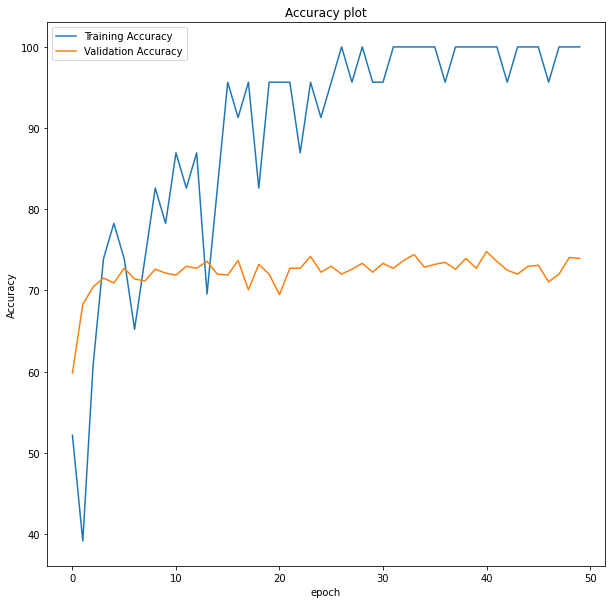

<Figure size 864x504 with 0 Axes>

In [ ]:
epochs = [i for i in range(NUM_EPOCHS)]
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy plot')

plt.plot(epochs,training_accuracy,label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')    
plt.legend()
plt.figure(figsize = (12,7))
plt.savefig('Accuracy_AlexNet_Fer_PreTrained.png')

# Loss Plot

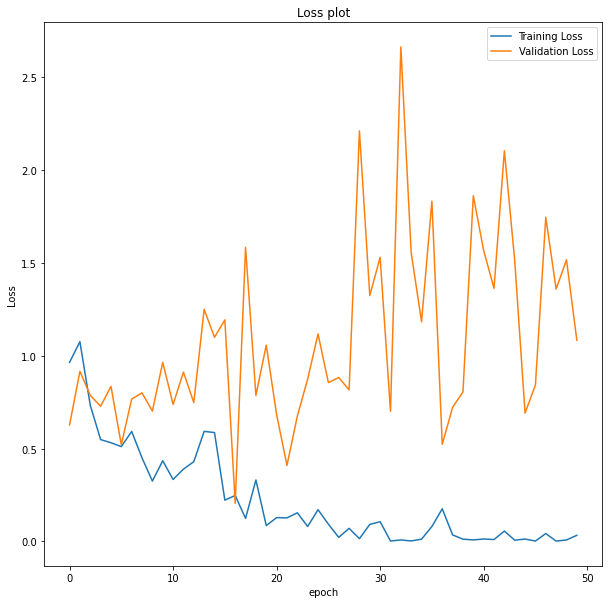

<Figure size 864x504 with 0 Axes>

In [ ]:
epochs = [i for i in range(NUM_EPOCHS)]
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss plot')

plt.plot(epochs,training_loss,label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')    
plt.legend()
plt.figure(figsize = (12,7))
plt.savefig('Loss_AlexNet_Fer_PreTrained.png')

# Confusion Matrix

[[156  78  52]
 [ 26 104  52]
 [ 52  52 182]]


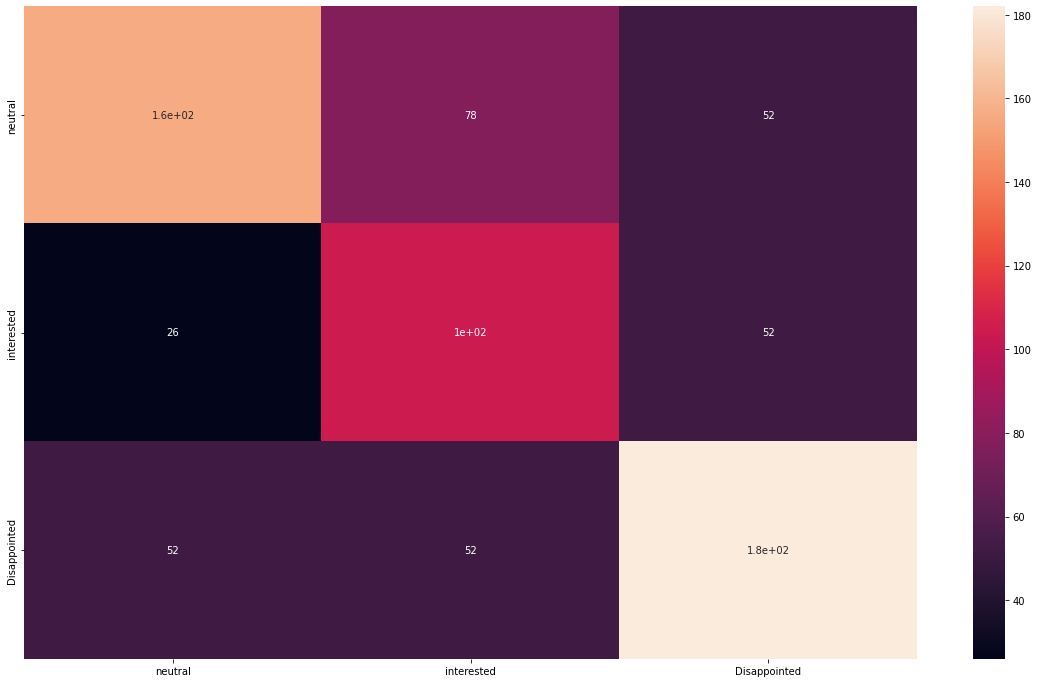

In [ ]:
y_pred = []
y_true = []

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

for inputs, labels in test_loader:
        inputs, labels = data[0].to(device), data[1].to(device)
        output = model(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

# constant for classes
classes = ('neutral', 'interested', 'Disappointed')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print(cf_matrix)

import seaborn as sns

# sns.heatmap(cf_matrix, annot=True)
df_cm = pd.DataFrame(cf_matrix, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (20, 12))
sn.heatmap(df_cm, annot=True)
plt.savefig('Confusion_matrix_AlexNet_Fer_PreTrained.png')

## T-SNE Visualisation

In [ ]:
#TSNE

face_map = {0:'interested', 1:'neutral', 2:'Disappointed'}
model.eval()
targets_list = []
outputs_list = []

with torch.no_grad():
    for idx, (inputs, targets) in enumerate(train_loader):
        inputs = inputs.to(device)
        targets = targets.to(device)
        targets_np = targets.data.cpu().numpy()

        outputs = model(inputs)
        outputs_np = outputs.data.cpu().numpy()

        targets_list.append(targets_np[:, np.newaxis])
        outputs_list.append(outputs_np)

targets = np.concatenate(targets_list, axis=0)
outputs = np.concatenate(outputs_list, axis=0).astype(np.float64)

print(len(targets))
print(len(outputs))

2903
2903


generating t-SNE plot...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[[0]
 [2]
 [1]
 ...
 [2]
 [0]
 [0]]
              x          y       targets
0     32.898941 -33.060371    interested
1     15.504895  19.317118  Disappointed
2    -55.862663 -22.672644       neutral
3    -11.298740 -37.508862    interested
4     -9.637750 -30.101135    interested
...         ...        ...           ...
2898  27.363878 -58.765396    interested
2899 -47.439335  22.082071       neutral
2900  39.253193  33.179657  Disappointed
2901  -5.164594 -49.875278    interested
2902  10.182263 -19.611961    interested

[2903 rows x 3 columns]
done!


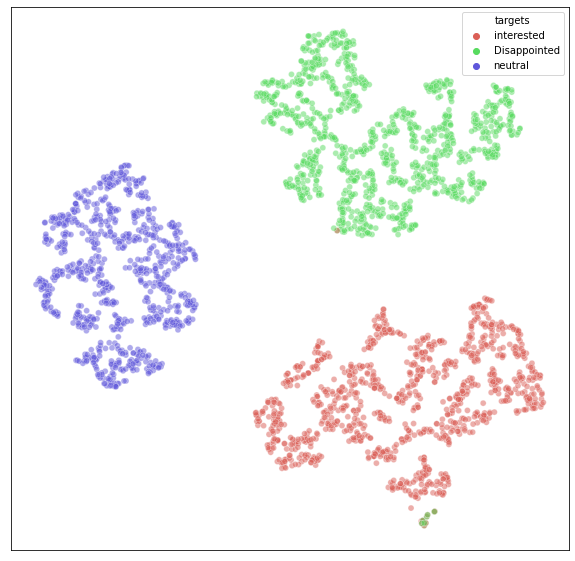

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
print('generating t-SNE plot...')
# tsne_output = bh_sne(outputs)
tsne = TSNE(random_state=0)
tsne_output = tsne.fit_transform(outputs)

df = pd.DataFrame(tsne_output, columns=['x', 'y'])
df.insert(2, 'targets', targets, True)
df.loc[:, 'targets'] = df.targets.map(face_map)

print(targets)
print(df)

plt.rcParams['figure.figsize'] = 10, 10
sns.scatterplot(
    x='x', y='y',
    hue='targets',
    palette=sns.color_palette("hls", 3),
    data=df,
    marker='o',
    legend="full",
    alpha=0.5
)

plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')

# plt.savefig(os.path.join(save_dir,'tsne.png'), bbox_inches='tight')
print('done!')
plt.savefig('TSNE_Alex_Fer.png')